In [ ]:
import os
import glob
import re
import numpy as np
import matplotlib.pyplot as plt

def AxesGiver(xAx:str, yAx:str, title:str):
    return plt.xlabel(xAx), plt.ylabel(yAx), plt.title(title)


def dataFinder(folder:str): 
    """
    Takes: string of the folder that contains data and a list of similarly named files, from current directory
    Returns: [0] - batcharr - sorted array of the batch sizes each file contains as an NParray 
             [1] - batchdir - list of files in the same order as the batch size array
    """

    batcharr=np.array([])
    batchdir=[]
    curdir = os.getcwd()
# 
    for n in glob.glob(folder+'\\*'):
        batchdir.append(n)
        search = re.search(r"\d+.txt", n) #parse out the 'diff\d+' part of the filename
        search2 = re.search(r'\d+', search.group(0)) 
        if search:
            intpart = search2.group(0)
            batcharr = np.insert(batcharr, [0], values=intpart)



    batcharr = np.sort(batcharr)
    batchdir.sort(key=lambda f: int(re.sub('\D', '', f))) #stack overflow ily 
    #look into this one 
    #only extract the numbers, you have the order of numbers so you can infer what the order of the text files would be. 
    #sorting two arrays indep is always really dangerous
    #how dmitry would do it is:
    #either define the array of batch sizes by hand OR 
    #infer it, look over batch sizes, in the loop construct the file name, access the file name, read something
    
    
    #also ^ that's how lambda  functions in python, idr how to do them in c++ so no comparison here

    return batcharr, batchdir



In [ ]:


def autodat2(foldername:str, yParam:str, linename:str, dashed=None): #x and y are numpy arrays

    x=np.array([])
    y=np.array([])
    y_error = np.array([])
    yParam = str(' ' + yParam  + '*')
    filedir = dataFinder(foldername)[1] #returns the file that works with the batchint
    x = dataFinder(foldername)[0]

    for f in filedir: 
         #loop over batchsizes instead of filename - you know batch size, you know file name.
        #it doesn't make sense to have diff10 in a diffdata folder. every file should have one place where it says diff or same or whatever
        #no extra info is needed!!!! try to condense info, keep things simple
        #have the batchsize, you know the path to where the files are stored, you can just get from the file.
        

        #filedir = f"{data_label}data"
        #filename = f"{data_label}{batch_size}.txt"
        #filepath = f"{filedir}/{filename}"
        # define somewhere the function get_value() where you will put readlines, re.search(), etc.
        y_values = getValue(f, yParam) #getvalue only takes one file at a time
        y_mean = np.average(y_values)
        y_err = np.std(y_values)/np.sqrt(len(y_values))
        y = np.append(y, y_mean)
        y_error = np.append(y_error, y_err)
        print(f)

        #print(y_values)

    if dashed != None:
        print(x, y)
        return plt.errorbar(x, y, yerr=y_error, linestyle = 'dashed', label=linename), plt.scatter(x, y)
    else:
        print(x, y)
        return plt.errorbar(x, y, yerr=y_error, label=linename), plt.scatter(x, y)


def getValue(filename:str, yPara, CPU=None):
    if CPU != None:
        countgV = 1
    else:
        countgV = 0
    yval = np.array([])
    with open(filename) as d:     #using 'with' keyword will auto-close the file at the end
        for s in d.readlines(): #for the string in whatever line is being read
            if re.search(yPara, s):
                value = re.search(r"\d+\.\d+", s) #the value itself
                if value:
                    l, i, j = re.search(' loop', yPara), re.search(' init', yPara), re.search(' job', yPara)
                    if l or i or j:
                        if (countgV % 2) == 0:
                            yval = np.append(yval, values= float(value.group()))
                            countgV = countgV + 1
                        else:
                            countgV = countgV + 1
                    else:
                        yval = np.append(yval, values= float(value.group()))


        #yval = np.average(yval)            
        return yval 


c:\Users\pursue\Documents\jupityr\nodegraphs\CPUdata\CPU10.txt
c:\Users\pursue\Documents\jupityr\nodegraphs\CPUdata\CPU25.txt
c:\Users\pursue\Documents\jupityr\nodegraphs\CPUdata\CPU50.txt
c:\Users\pursue\Documents\jupityr\nodegraphs\CPUdata\CPU75.txt
c:\Users\pursue\Documents\jupityr\nodegraphs\CPUdata\CPU100.txt
c:\Users\pursue\Documents\jupityr\nodegraphs\CPUdata\CPU125.txt
[ 10.  25.  50.  75. 100. 125.] [447.7655     306.2535     379.70133333 334.61466667 359.6251
 360.7353    ]
c:\Users\pursue\Documents\jupityr\nodegraphs\diffdata\diff10.txt
c:\Users\pursue\Documents\jupityr\nodegraphs\diffdata\diff25.txt
c:\Users\pursue\Documents\jupityr\nodegraphs\diffdata\diff50.txt
c:\Users\pursue\Documents\jupityr\nodegraphs\diffdata\diff75.txt
c:\Users\pursue\Documents\jupityr\nodegraphs\diffdata\diff100.txt
c:\Users\pursue\Documents\jupityr\nodegraphs\diffdata\diff125.txt
[ 10.  25.  50.  75. 100. 125.] [364.59242857 326.1564     324.605      264.1452     275.338
 270.35075   ]
c:\Users\pu

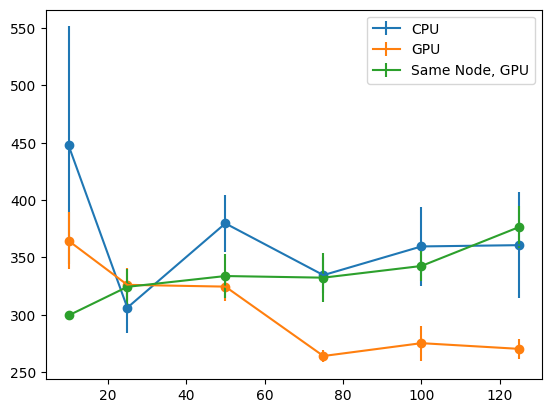

In [26]:
  #  linename = os.path.basename(os.path.normpath(g)) #take the tail of the normalized path we're looking at
linename=["CPU", "GPU", "Same Node, GPU"]
co = 0
for g in glob.glob(os.getcwd() + '\\*\\'): #takes only the folders in our current directory - ignores any files
    #linename= re.search(r'\\*\\$',g)
    #normalized as in, no more literals
    autodat2(g, "Time report", linename[co])
    co = co+1

plt.legend()


In [71]:
"""samebatch, samedir = dataFinder('\\samedata\\same*')[0], dataFinder('\\samedata\\same*')[1]
CPUbatch, CPUdir = dataFinder('\\CPUdata\\CPU*')[0], dataFinder('\\CPUdata\\CPU*')[1]


autodat2(diffdir, diffbatch, "Event Throughput", "different node", "Blue")
autodat2(samedir, samebatch, "Event Throughput", "same node", "Green")
autodat2(CPUdir, CPUbatch, "Event Throughput", "CPU", "Orange")

AxesGiver("Batch size", "Event Throughput", "Client/Server inference data with the PK4_PT")

plt.legend() 
plt.show() #don't show - instead save it to a file and loop. for loop for what to search for

"""

'samebatch, samedir = dataFinder(\'\\samedata\\same*\')[0], dataFinder(\'\\samedata\\same*\')[1]\nCPUbatch, CPUdir = dataFinder(\'\\CPUdata\\CPU*\')[0], dataFinder(\'\\CPUdata\\CPU*\')[1]\n\n\nautodat2(diffdir, diffbatch, "Event Throughput", "different node", "Blue")\nautodat2(samedir, samebatch, "Event Throughput", "same node", "Green")\nautodat2(CPUdir, CPUbatch, "Event Throughput", "CPU", "Orange")\n\nAxesGiver("Batch size", "Event Throughput", "Client/Server inference data with the PK4_PT")\n\nplt.legend() \nplt.show() #don\'t show - instead save it to a file and loop. for loop for what to search for\n\n'

[ 10.  25.  50.  75. 100. 125.] ['c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\diffdata\\diff10.txt', 'c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\diffdata\\diff25.txt', 'c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\diffdata\\diff50.txt', 'c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\diffdata\\diff75.txt', 'c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\diffdata\\diff100.txt', 'c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\diffdata\\diff125.txt']


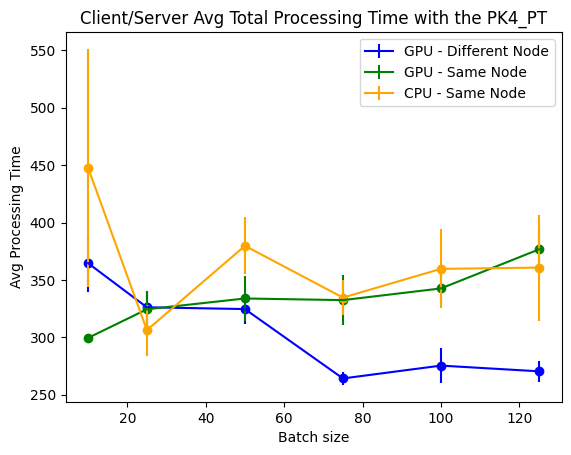

<Figure size 640x480 with 0 Axes>

In [146]:


diffbatch, diffdir = dataFinder('\\diffdata\\diff*')[0], dataFinder('\\diffdata\\diff*')[1]
samebatch, samedir = dataFinder('\\samedata\\same*')[0], dataFinder('\\samedata\\same*')[1]
CPUbatch, CPUdir = dataFinder('\\CPUdata\\CPU*')[0], dataFinder('\\CPUdata\\CPU*')[1]

batchlist = [diffbatch, samebatch, CPUbatch]
dirlist = [diffdir, samedir, CPUdir]


autodat2(diffdir, diffbatch, "Time report", "GPU - Different Node", "Blue")
autodat2(samedir, samebatch, "Time report", "GPU - Same Node", "Green")
autodat2(CPUdir, CPUbatch, "Time report", "CPU - Same Node", "Orange")

AxesGiver("Batch size", "Avg Processing Time", "Client/Server Avg Total Processing Time with the PK4_PT")
plt.legend()
plt.show()
plt.savefig("TotalProc.png")

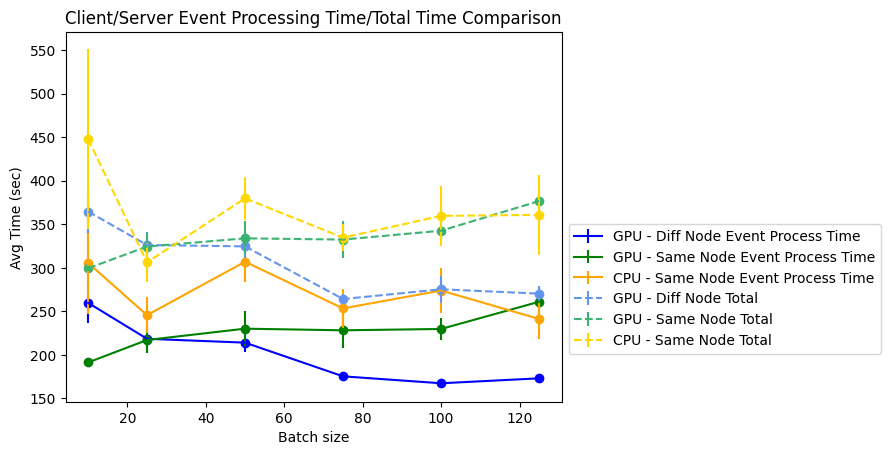

<Figure size 640x480 with 0 Axes>

In [143]:
autodat2(diffdir, diffbatch, "Total loop", "GPU - Diff Node Event Process Time", "Blue")
autodat2(samedir, samebatch, "Total loop", "GPU - Same Node Event Process Time", "Green")
autodat2(CPUdir, CPUbatch, "Total loop", "CPU - Same Node Event Process Time", "Orange")

autodat2(diffdir, diffbatch, "Time report", "GPU - Diff Node Total", "cornflowerblue" ,'y')
autodat2(samedir, samebatch, "Time report", "GPU - Same Node Total", "mediumseagreen", 'y')
autodat2(CPUdir, CPUbatch, "Time report", "CPU - Same Node Total", "gold", 'y')

AxesGiver("Batch size", "Avg Time (sec)", "Client/Server Event Processing Time/Total Time Comparison")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
#plt.legend()
plt.show()
plt.savefig("EventTime.png")

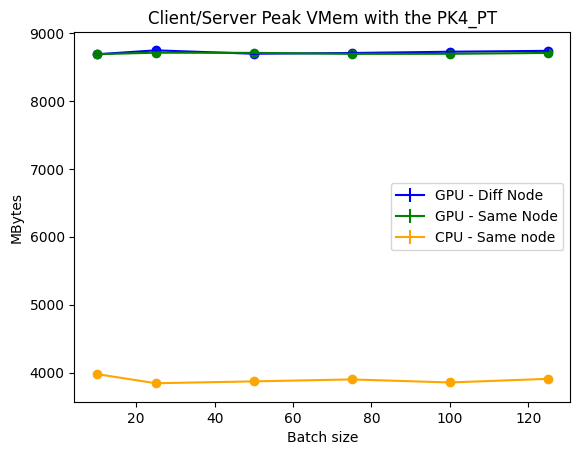

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [145]:
autodat2(diffdir, diffbatch, "Peak", "GPU - Diff Node", "Blue")
autodat2(samedir, samebatch, "Peak", "GPU - Same Node", "Green")
autodat2(CPUdir, CPUbatch, "Peak", "CPU - Same node", "Orange")


AxesGiver("Batch size", "MBytes", "Client/Server Peak VMem with the PK4_PT")

plt.legend()
plt.show()
plt.figure(111)

In [ ]:
def dataFinderInt(folder:str): 
    """
    Takes: string of the folder that contains data and a list of similarly named files, from current directory
    Returns: [0] - batcharr - sorted array of the batch sizes each file contains as an NParray 
             [1] - batchdir - list of files in the same order as the batch size array
    """

    curdir = os.getcwd()

    for n in glob.glob(folder+'\\*\\*'):
        search = re.search(r'\\*'+ str(batchsize) + r'.txt', n) #parse out the 'diff\d+' part of the filename
        print(search)
        if search:
            return search #returns a single file

#            batchdir = np.sort()



    #batcharr = np.sort(batcharr)
    #.sort(key=lambda f: int(re.sub('\D', '', f))) 
    #look into this one 
    #only extract the numbers, you have the order of numbers so you can infer what the order of the text files would be. 
    #sorting two arrays indep is always really dangerous
    #how dmitry would do it is:
    #either define the array of batch sizes by hand OR 
    #infer it, look over batch sizes, in the loop construct the file name, access the file name, read something
